In [1]:
import warnings
warnings.filterwarnings("ignore") #To avoid warnings.
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.Embarked.fillna(df.Embarked.mode()[0],inplace = True)

In [21]:
corrdf = df.drop(columns = ['PassengerId','Name','Sex','Ticket','Cabin','Embarked'])
corrdf.corr().style.background_gradient(cmap="Blues")
#founded that age,parch,fare affects the survived rate so takes it all as inputs

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: xlabel='Pclass'>

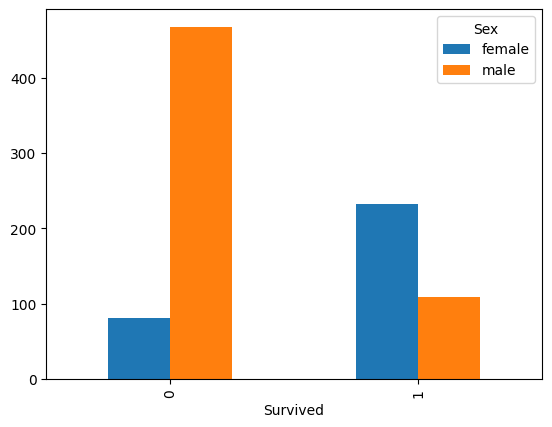

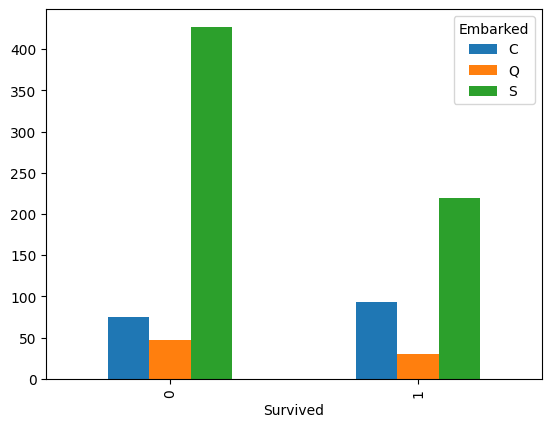

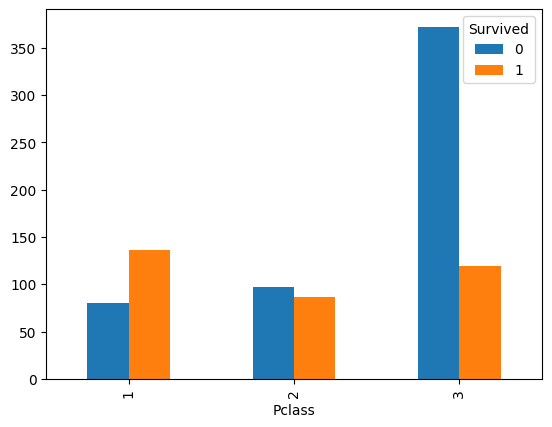

In [25]:
#find other attributes effects survive rate.
pd.crosstab(df['Survived'],df['Sex']).plot(kind='bar')
pd.crosstab(df['Survived'],df['Embarked']).plot(kind='bar')
pd.crosstab(df['Pclass'],df['Survived']).plot(kind='bar')

In [51]:
dff = df.drop(columns = ['PassengerId','Survived','Pclass','Name','SibSp','Ticket','Cabin','Embarked'])
y = df["Survived"]
x = pd.get_dummies(dff,dtype=int)
x

,Age,Parch,Fare,Sex_female,Sex_male
0,22.000000,0,7.2500,0,1
1,38.000000,0,71.2833,1,0
2,26.000000,0,7.9250,1,0
3,35.000000,0,53.1000,1,0
4,35.000000,0,8.0500,0,1
...,...,...,...,...,...
886,27.000000,0,13.0000,0,1
887,19.000000,0,30.0000,1,0
888,29.699118,2,23.4500,1,0
889,26.000000,0,30.0000,0,1


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [37]:
model = DecisionTreeClassifier()

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
#program:
age = float(input("Enter your age:"))
parch = int(input("Enter your Parch:"))
fare = float(input("Enter Your Fare:"))
sex = input("Enter your sex(male/female):")
if(sex == 'Male' or sex == 'male' or sex == "MALE"):
    f,m = 0,1
else:
    f,m = 1,0
    
ans = model.predict([[age,parch,fare,f,m]])
if(ans[0] == 0):
    print("You will die")
else:
    print("Yow will survive")

Enter your age: 34
Enter your Parch: 0
Enter Your Fare: 45
Enter your sex(male/female): male


You will die


In [93]:
accuracy = int(model.score(x_test,y_test)*100)
print(f"The accuracy of trained model is:{accuracy}%")

The accuracy of trained model is:81%
